# Matlab and Octave

In [1]:
import statsmodels.api as sm
from scipy.io import savemat

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
savemat("sunspots", {"sunspots": df.values})

# R

Kruskal KruskalResult(statistic=15.022124661246552, pvalue=0.0046555484175328015)


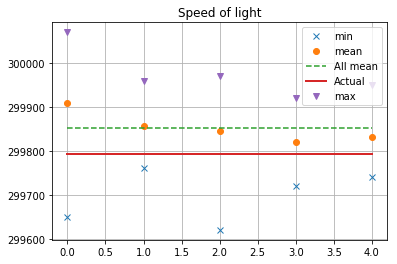

In [2]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects import r

from scipy.stats import kruskal
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c

pandas2ri.activate()
r.data('morley')
df = r['morley']

df['Speed'] = df['Speed'] + 299000

samples = dict(list(df.groupby('Expt')))
samples = np.array([samples[i]['Speed'].values for i in 
samples.keys()])
print("Kruskal", kruskal(samples[0], samples[1], samples[2], samples[3], samples[4]))

plt.title('Speed of light')
plt.plot(samples.min(axis=1), 'x', label='min')
plt.plot(samples.mean(axis=1), 'o', label='mean')
plt.plot(np.ones(5) * samples.mean(), '--', label='All mean')
plt.plot(np.ones(5) * c/1000, lw=2, label='Actual')
plt.plot(samples.max(axis=1), 'v', label='max')
plt.grid(True)
plt.legend()
plt.show()

# Java

In [3]:
import jpype
import numpy as np
from numpy import random
jpype.startJVM(jpype.getDefaultJVMPath())

random.seed(44)
values = np.random.randn(7)
java_array = jpype.JArray(jpype.JDouble, 1)(values.tolist())

for item in java_array:
   jpype.java.lang.System.out.println(item)

jpype.shutdownJVM()